In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from catboost import CatBoostRegressor, Pool

In [4]:
df = pd.read_excel('data/absolut_data.xlsx')

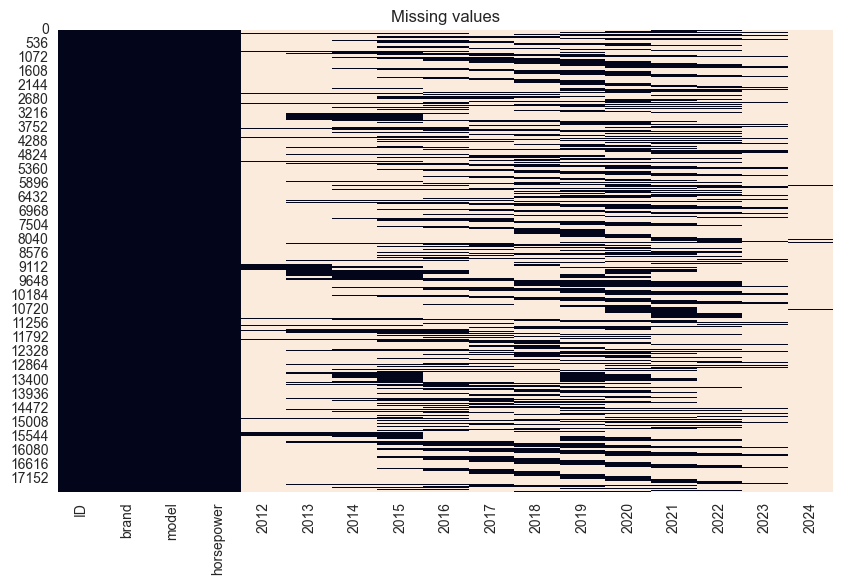

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='rocket')
plt.title('Missing values')
plt.show()

In [6]:
df.head(15)

,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,Acura,MDX,290.0,NaN,NaN,NaN,NaN,3225000.0,3505200.0,3808200.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN
1,2,Acura,MDX,290.0,NaN,NaN,NaN,NaN,3239500.0,3521000.0,3825500.0,4148000.0,4517400.0,NaN,NaN,NaN,NaN
2,3,Acura,MDX,290.0,NaN,NaN,2400700.0,2672500.0,2968300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Acura,MDX,290.0,NaN,NaN,2569800.0,2855600.0,3166200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acura,RDX,277.0,NaN,NaN,2029300.0,2197200.0,2454400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Acura,TLX,208.0,NaN,NaN,1773700.0,1925400.0,2086800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Acura,TLX,290.0,NaN,NaN,1983600.0,2150500.0,2327700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Acura,RDX,279.0,NaN,NaN,NaN,NaN,2290100.0,2472200.0,2667500.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Acura,RDX,279.0,NaN,NaN,NaN,NaN,2586100.0,2534200.0,2734400.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Acura,RDX,279.0,NaN,NaN,NaN,NaN,2453600.0,2648700.0,2857900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
missing_percentage_year = df.iloc[:, 4:].isnull().mean().round(4) * 100

# Create a DataFrame with the results
missing_values_table = pd.DataFrame({
    'Year': missing_percentage_year.index,
    'Missing Values (%)': missing_percentage_year.values
})
missing_values_table


,Year,Missing Values (%)
0,2012,95.74
1,2013,88.19
2,2014,81.29
3,2015,69.88
4,2016,70.40
5,2017,68.46
6,2018,62.49
7,2019,54.06
8,2020,54.76
9,2021,63.47


In [8]:
df['model'].unique()

array(['MDX', 'RDX', 'TLX', '4C', 'Bravo', 'Giulia', 'Stelvio', 'A8',
       'A5', 'Q5', 'A6 allroad quattro', 'TT', 'A6', 'A7', 'S7', 'TTS',
       'A3', 'A4 allroad quattro', 'S5', 'S8', 'SQ5', 'Q3', 'S6', 'R8',
       'Q8', 'Q7', 'RS 6', 'RS 7', 'S3', 'A4', 'TT RS', 'RS 4', 'RS 5',
       'RS Q8', 'SQ7', 'SQ8', 'A1', 'RS 3', 'RS Q3', 'S8 Plus', 'e-tron',
       'Q4 e-tron', 'e-tron S', 'Innoson', 'U5 Plus', 'X35',
       '33462 Fenix', '33463 Tonik', '33468 Fenix', 'Mulsanne', 'Z4',
       '5er', '6er', 'X2', 'X3', 'X5', 'X6', '3er', '2er', '4er', 'X4',
       'i8', '7er', 'X1', '8er', 'X7', '1er', 'i3', 'iX', 'i7', 'V5',
       'H230', 'V3', 'H530', 'M4', 'Encore', 'Qin', 'Escalade', 'CTS',
       'SRX', 'ATS', 'XT5', 'XT6', 'CT6', 'XT4', 'CS35', 'Eado', 'Raeton',
       'CS35 Plus', 'CS55', 'CS75', 'Alsvin', 'CS95', 'UNI-V', 'Bonus',
       'IndiS', 'Very', 'Tiggo 3', 'Tiggo 5', 'Bonus 3', 'M11',
       'Tiggo FL', 'Tiggo 8', 'Tiggo 4', 'Arrizo 7', 'Tiggo 2', 'Tiggo 7',
       'Ti

- ID: Идентификатор автомобиля
- brand: Марка 
- model: Модель 
- horsepower: Мощность 
- 2012 - 2024: Цены 

In [9]:
df.shape, df.isnull().sum(),df.describe()

((17680, 17),
 ID                0
 brand             0
 model             0
 horsepower        0
 2012          16927
 2013          15592
 2014          14372
 2015          12354
 2016          12447
 2017          12103
 2018          11048
 2019           9558
 2020           9681
 2021          11221
 2022          12674
 2023          15393
 2024          17508
 dtype: int64,
                  ID    horsepower          2012          2013          2014  \
 count  17680.000000  17680.000000  7.530000e+02  2.088000e+03  3.308000e+03   
 mean    8840.500000    205.550592  1.791254e+06  2.296387e+06  2.398044e+06   
 std     5103.920715    110.557935  1.063943e+06  1.713524e+06  1.708317e+06   
 min        1.000000     11.000000  1.746000e+05  1.930000e+05  2.138000e+05   
 25%     4420.750000    130.000000  1.095400e+06  9.997500e+05  1.184150e+06   
 50%     8840.500000    163.000000  1.577100e+06  1.723000e+06  1.812900e+06   
 75%    13260.250000    249.000000  2.159300e+06  3.17

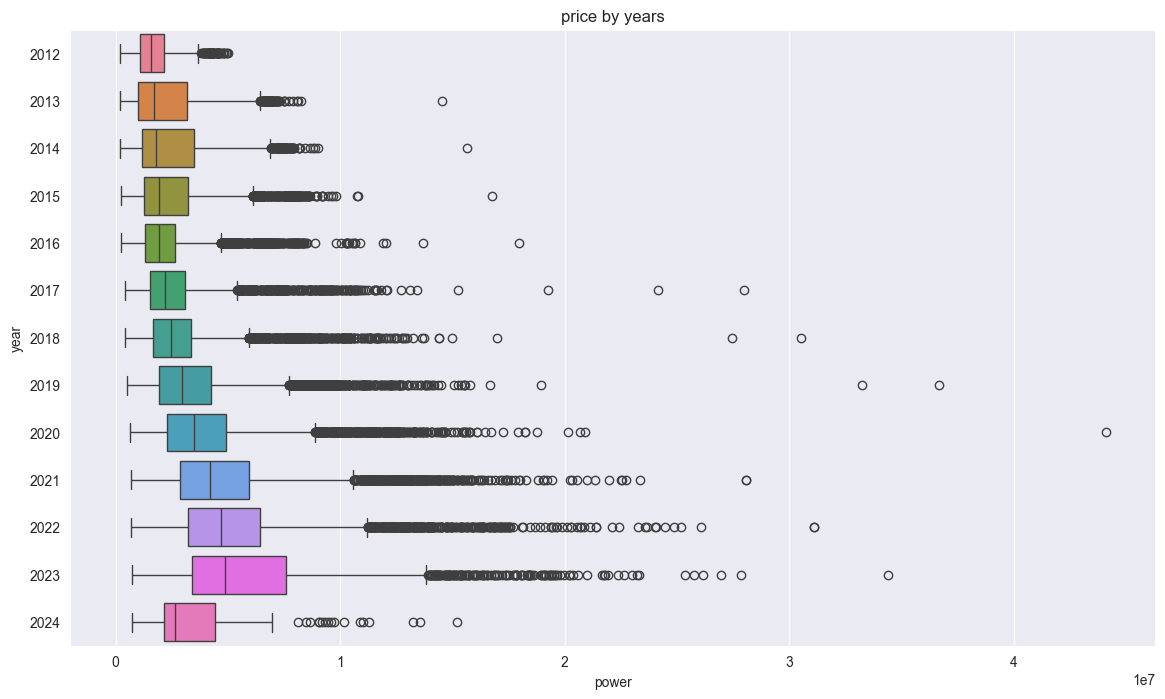

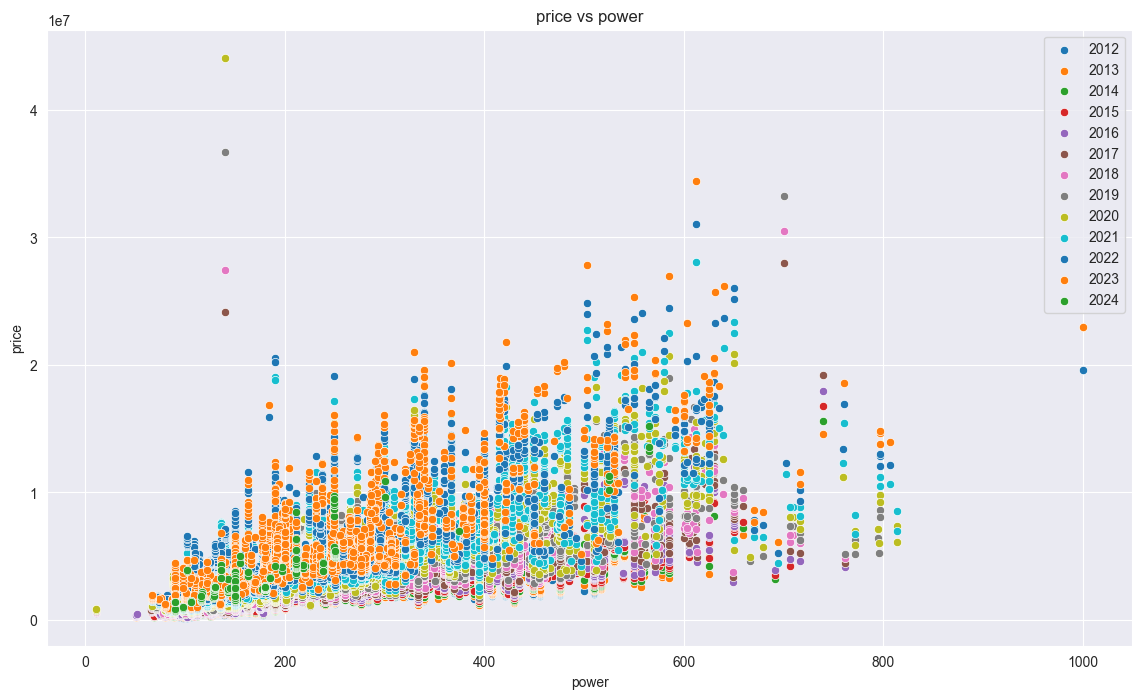

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.iloc[:, 4:], orient="h")
plt.title('price by years')
plt.xlabel('power')
plt.ylabel('year')
plt.show()


plt.figure(figsize=(14, 8))
for year in range(2012, 2025):
    sns.scatterplot(x=df['horsepower'], y=df[str(year)], label=str(year))
plt.title('price vs power')
plt.xlabel('power')
plt.ylabel('price')
plt.legend()
plt.show()


In [11]:
for col in df.columns:
    display(df.sort_values(by = col,ascending=False).head())

,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
17679,17680,Урал,5308,230.0,NaN,NaN,2075300.0,2295000.0,NaN,NaN,NaN,3403300.0,3750800.0,NaN,NaN,NaN,NaN
17678,17679,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2376300.0,2500000.0
17677,17678,Москвич,3,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804500.0,1940600.0,NaN
17676,17677,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007000.0,2158500.0,NaN
17675,17676,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927200.0,2072600.0,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
17679,17680,Урал,5308,230.0,NaN,NaN,2075300.0,2295000.0,NaN,NaN,NaN,3403300.0,3750800.0,NaN,NaN,NaN,NaN
17678,17679,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2376300.0,2500000.0
17677,17678,Москвич,3,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804500.0,1940600.0,NaN
17676,17677,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007000.0,2158500.0,NaN
17675,17676,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927200.0,2072600.0,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
7517,7518,Lada,xRay,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1041700.0,1136500.0,1299000.0,NaN,NaN
7786,7787,Lada,xRay,122.0,NaN,NaN,NaN,NaN,NaN,NaN,915800.0,1004900.0,NaN,NaN,NaN,NaN,NaN
7788,7789,Lada,xRay,122.0,NaN,NaN,NaN,NaN,NaN,NaN,906000.0,994100.0,NaN,NaN,NaN,NaN,NaN
7789,7790,Lada,xRay,122.0,NaN,NaN,NaN,NaN,NaN,NaN,926500.0,1016600.0,NaN,NaN,NaN,NaN,NaN
7790,7791,Lada,xRay,106.0,NaN,NaN,NaN,NaN,NaN,NaN,929400.0,1015900.0,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4741,4742,GMC,Hummer EV,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19613600.0,22996100.0,NaN
14796,14797,Tesla,Model X,814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7329300.0,8576900.0,NaN,NaN,NaN
14793,14794,Tesla,Model S,814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6115100.0,6962000.0,NaN,NaN,NaN
3654,3655,Dodge,Challenger,807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10650700.0,12177700.0,13940700.0,NaN
3618,3619,Dodge,Challenger,797.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8092400.0,9233300.0,10542600.0,12054200.0,13799300.0,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
9078,9079,Mercedes-Benz,Actros,456.0,4999000.0,5558200.0,6174400.0,6853200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9070,9071,Mercedes-Benz,Actros,435.0,4961600.0,5516600.0,6128100.0,6801900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9063,9064,Mercedes-Benz,Actros,408.0,4924100.0,5475000.0,6081900.0,6750600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9079,9080,Mercedes-Benz,Actros,456.0,4839900.0,5381300.0,5977800.0,6635100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9072,9073,Mercedes-Benz,Actros,435.0,4804000.0,5341400.0,5933500.0,6585900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
3737,3738,Ferrari,F12Berlinetta,740.0,NaN,14552000.0,15637600.0,16777800.0,17975300.0,19232900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12806,12807,Porsche,911,520.0,NaN,8260200.0,9001500.0,9792300.0,10635600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12808,12809,Porsche,911,560.0,NaN,8131400.0,8874200.0,9668100.0,10516700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12801,12802,Porsche,911,520.0,NaN,8072000.0,8795800.0,9567600.0,10390800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12802,12803,Porsche,911,560.0,NaN,7907700.0,8659900.0,9433900.0,10261000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
3737,3738,Ferrari,F12Berlinetta,740.0,NaN,14552000.0,15637600.0,16777800.0,17975300.0,19232900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12806,12807,Porsche,911,520.0,NaN,8260200.0,9001500.0,9792300.0,10635600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12808,12809,Porsche,911,560.0,NaN,8131400.0,8874200.0,9668100.0,10516700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12801,12802,Porsche,911,520.0,NaN,8072000.0,8795800.0,9567600.0,10390800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12802,12803,Porsche,911,560.0,NaN,7907700.0,8659900.0,9433900.0,10261000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
3737,3738,Ferrari,F12Berlinetta,740.0,NaN,14552000.0,15637600.0,16777800.0,17975300.0,19232900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9883,9884,Mercedes-Benz,G-class,630.0,NaN,NaN,NaN,10775200.0,11893800.0,13113400.0,14414200.0,NaN,NaN,NaN,NaN,NaN,NaN
168,169,Audi,R8,610.0,NaN,NaN,NaN,10740400.0,12028700.0,13438100.0,14991100.0,16674300.0,NaN,NaN,NaN,NaN,NaN
12806,12807,Porsche,911,520.0,NaN,8260200.0,9001500.0,9792300.0,10635600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12808,12809,Porsche,911,560.0,NaN,8131400.0,8874200.0,9668100.0,10516700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
3737,3738,Ferrari,F12Berlinetta,740.0,NaN,14552000.0,15637600.0,16777800.0,17975300.0,19232900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10230,10231,Mercedes-Benz,G-class,421.0,NaN,NaN,NaN,NaN,13669900.0,15246800.0,16985700.0,NaN,NaN,NaN,NaN,NaN,NaN
168,169,Audi,R8,610.0,NaN,NaN,NaN,10740400.0,12028700.0,13438100.0,14991100.0,16674300.0,NaN,NaN,NaN,NaN,NaN
9883,9884,Mercedes-Benz,G-class,630.0,NaN,NaN,NaN,10775200.0,11893800.0,13113400.0,14414200.0,NaN,NaN,NaN,NaN,NaN,NaN
12834,12835,Porsche,911,540.0,NaN,NaN,NaN,NaN,10881500.0,11821500.0,12837200.0,13912500.0,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
12900,12901,Porsche,911,700.0,NaN,NaN,NaN,NaN,NaN,27970700.0,30526200.0,33250000.0,NaN,NaN,NaN,NaN,NaN
16146,16147,Volkswagen,Crafter,140.0,NaN,NaN,NaN,NaN,NaN,24144400.0,27446000.0,36664700.0,44094700.0,NaN,NaN,NaN,NaN
3737,3738,Ferrari,F12Berlinetta,740.0,NaN,14552000.0,15637600.0,16777800.0,17975300.0,19232900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10230,10231,Mercedes-Benz,G-class,421.0,NaN,NaN,NaN,NaN,13669900.0,15246800.0,16985700.0,NaN,NaN,NaN,NaN,NaN,NaN
168,169,Audi,R8,610.0,NaN,NaN,NaN,10740400.0,12028700.0,13438100.0,14991100.0,16674300.0,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
12900,12901,Porsche,911,700.0,NaN,NaN,NaN,NaN,NaN,27970700.0,30526200.0,33250000.0,NaN,NaN,NaN,NaN,NaN
16146,16147,Volkswagen,Crafter,140.0,NaN,NaN,NaN,NaN,NaN,24144400.0,27446000.0,36664700.0,44094700.0,NaN,NaN,NaN,NaN
10230,10231,Mercedes-Benz,G-class,421.0,NaN,NaN,NaN,NaN,13669900.0,15246800.0,16985700.0,NaN,NaN,NaN,NaN,NaN,NaN
168,169,Audi,R8,610.0,NaN,NaN,NaN,10740400.0,12028700.0,13438100.0,14991100.0,16674300.0,NaN,NaN,NaN,NaN,NaN
9883,9884,Mercedes-Benz,G-class,630.0,NaN,NaN,NaN,10775200.0,11893800.0,13113400.0,14414200.0,NaN,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
16146,16147,Volkswagen,Crafter,140.0,NaN,NaN,NaN,NaN,NaN,24144400.0,27446000.0,36664700.0,44094700.0,NaN,NaN,NaN,NaN
12900,12901,Porsche,911,700.0,NaN,NaN,NaN,NaN,NaN,27970700.0,30526200.0,33250000.0,NaN,NaN,NaN,NaN,NaN
9486,9487,Mercedes-Benz,G-class,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18957600.0,20672900.0,22499400.0,24462500.0,26968200.0,NaN
168,169,Audi,R8,610.0,NaN,NaN,NaN,10740400.0,12028700.0,13438100.0,14991100.0,16674300.0,NaN,NaN,NaN,NaN,NaN
12902,12903,Porsche,911,607.0,NaN,NaN,NaN,NaN,NaN,12700900.0,14378300.0,15755000.0,NaN,NaN,NaN,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
16146,16147,Volkswagen,Crafter,140.0,NaN,NaN,NaN,NaN,NaN,24144400.0,27446000.0,36664700.0,44094700.0,NaN,NaN,NaN,NaN
12910,12911,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20886500.0,23338700.0,26044200.0,NaN,NaN
9486,9487,Mercedes-Benz,G-class,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18957600.0,20672900.0,22499400.0,24462500.0,26968200.0,NaN
12909,12910,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20153900.0,22539400.0,25172800.0,NaN,NaN
12912,12913,Porsche,911,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18759600.0,20338600.0,22092400.0,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10832,10833,Mercedes-Benz,S-class,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28061000.0,31076700.0,NaN,NaN
10439,10440,Mercedes-Benz,S-class,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28061000.0,31076700.0,34390500.0,NaN
12910,12911,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20886500.0,23338700.0,26044200.0,NaN,NaN
10438,10439,Mercedes-Benz,S-class,503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22705200.0,24856600.0,27845500.0,NaN
12909,12910,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20153900.0,22539400.0,25172800.0,NaN,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10832,10833,Mercedes-Benz,S-class,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28061000.0,31076700.0,NaN,NaN
10439,10440,Mercedes-Benz,S-class,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28061000.0,31076700.0,34390500.0,NaN
12910,12911,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20886500.0,23338700.0,26044200.0,NaN,NaN
12909,12910,Porsche,911,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20153900.0,22539400.0,25172800.0,NaN,NaN
10438,10439,Mercedes-Benz,S-class,503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22705200.0,24856600.0,27845500.0,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10439,10440,Mercedes-Benz,S-class,612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28061000.0,31076700.0,34390500.0,NaN
10438,10439,Mercedes-Benz,S-class,503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22705200.0,24856600.0,27845500.0,NaN
9486,9487,Mercedes-Benz,G-class,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18957600.0,20672900.0,22499400.0,24462500.0,26968200.0,NaN
12923,12924,Porsche,Cayenne Turbo GT,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21340100.0,23643800.0,26157100.0,NaN
12981,12982,Porsche,Cayenne Turbo GT,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23261600.0,25744900.0,NaN


,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
8149,8150,Land Rover,Range Rover,565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12975300.0,14539600.0,16250900.0,18135000.0,NaN,15188000.0
8379,8380,Land Rover,Range Rover,565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13871200.0,15413100.0,17104300.0,NaN,13532000.0
8141,8142,Land Rover,Range Rover,565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12126000.0,13512400.0,15023100.0,16680600.0,NaN,13251000.0
8145,8146,Land Rover,Range Rover,525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10987600.0,12272700.0,13675400.0,15216700.0,NaN,11277000.0
8140,8141,Land Rover,Range Rover,525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10731400.0,11993700.0,13372100.0,14887200.0,NaN,11005000.0


In [12]:
from data_tools.feature_engineering import create_avg_price, create_hp_classes, create_price_classes, \
    create_segments, add_country

df = (df.pipe(create_avg_price)
      .pipe(create_hp_classes)
      .pipe(create_price_classes, price_column = 'avg_price')
      .pipe(create_segments)
      .pipe(add_country)
)

In [13]:
df

,ID,brand,model,horsepower,2012,2013,2014,2015,2016,2017,...,2021,2022,2023,2024,avg_price,year_embedding,horsepower_range,price_class,segment,country
0,1,Acura,MDX,290.0,NaN,NaN,NaN,NaN,3225000.0,3505200.0,...,NaN,NaN,NaN,NaN,3.840760e+06,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]",250-299,Medium,Other,Japan
1,2,Acura,MDX,290.0,NaN,NaN,NaN,NaN,3239500.0,3521000.0,...,NaN,NaN,NaN,NaN,3.850280e+06,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]",250-299,Medium,Other,Japan
2,3,Acura,MDX,290.0,NaN,NaN,2400700.0,2672500.0,2968300.0,NaN,...,NaN,NaN,NaN,NaN,2.680500e+06,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",250-299,Medium-Low,Other,Japan
3,4,Acura,MDX,290.0,NaN,NaN,2569800.0,2855600.0,3166200.0,NaN,...,NaN,NaN,NaN,NaN,2.863867e+06,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",250-299,Medium-Low,Other,Japan
4,5,Acura,RDX,277.0,NaN,NaN,2029300.0,2197200.0,2454400.0,NaN,...,NaN,NaN,NaN,NaN,2.226967e+06,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",250-299,Medium-Low,Other,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17675,17676,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1927200.0,2072600.0,NaN,1.999900e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",100-199,Low,Other,Russia
17676,17677,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2007000.0,2158500.0,NaN,2.082750e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",100-199,Medium-Low,Other,Russia
17677,17678,Москвич,3,109.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1804500.0,1940600.0,NaN,1.872550e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",100-199,Low,Other,Russia
17678,17679,Москвич,3,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2376300.0,2500000.0,2.438150e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]",100-199,Medium-Low,Other,Russia


In [14]:
from data_tools.preprocessing import PriceDataProcessor

coefs_processor = PriceDataProcessor(df)
coefs_processor.calculate_growth()
coefs_processor.fill_missing_values()
coefs_processor.group_by_columns()
coefs_processor.df_grouped

,brand,model,horsepower,horsepower_range,country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Acura,MDX,290.0,250-299,Japan,1.0,1.076462,1.068556,1.112216,1.110078,1.086890,1.086462,1.089227,1.089055,1.077335,1.064480,1.077777,1.052056
1,Acura,RDX,272.0,250-299,Japan,1.0,1.076462,1.068556,1.082738,1.117058,1.079516,1.078999,1.089227,1.067301,1.077335,1.064480,1.077777,1.052056
2,Acura,RDX,277.0,250-299,Japan,1.0,1.076462,1.068556,1.082738,1.117058,1.079516,1.078999,1.089227,1.067301,1.077335,1.064480,1.077777,1.052056
3,Acura,RDX,279.0,250-299,Japan,1.0,1.076462,1.068556,1.082738,1.117058,1.079516,1.078999,1.089227,1.067301,1.077335,1.064480,1.077777,1.052056
4,Acura,TLX,208.0,200-249,Japan,1.0,1.088125,1.086007,1.085527,1.083827,1.076895,1.081760,1.079561,1.102843,1.113650,1.121322,1.085907,1.038688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,Zotye,Z300,112.0,100-199,China,1.0,1.095722,1.090353,1.110109,1.083792,1.082194,1.081725,1.092644,1.073995,1.074571,1.073588,1.075444,1.076688
2553,Zotye,Z300,122.0,100-199,China,1.0,1.095722,1.090353,1.110109,1.083792,1.082214,1.081838,1.092644,1.073995,1.074571,1.073588,1.075444,1.076688
2554,Москвич,3,109.0,100-199,Russia,1.0,1.062115,1.101529,1.085486,1.083832,1.076908,1.091347,1.089138,1.089053,1.108818,1.086236,1.075423,1.052056
2555,Москвич,3,150.0,100-199,Russia,1.0,1.062115,1.101529,1.085486,1.083832,1.076908,1.091347,1.089138,1.089053,1.108818,1.086236,1.075446,1.052056


In [15]:
df_filled = coefs_processor.df_grouped

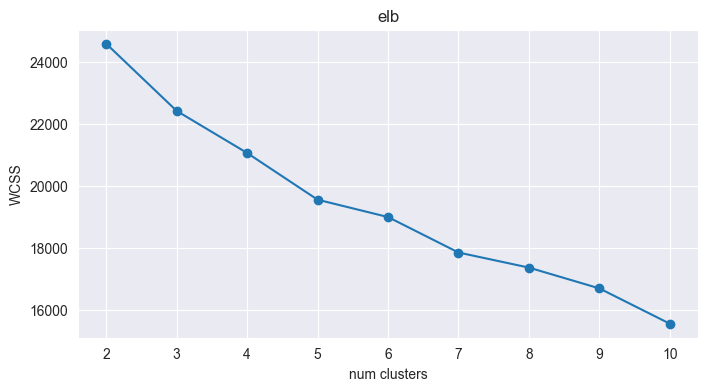

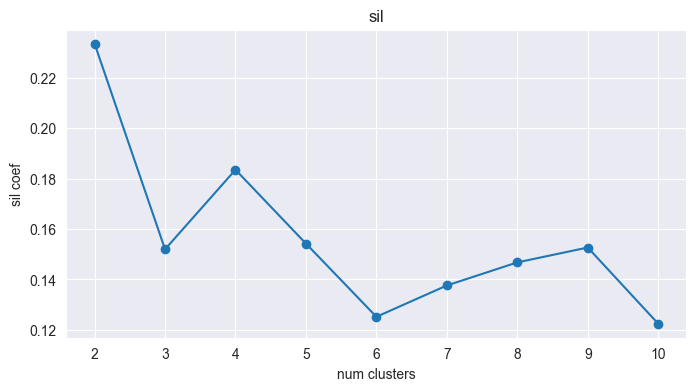

In [16]:
features = list(map(str, range(2013, 2025)))
X = df_filled[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('elb')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('sil')
plt.xlabel('num clusters')
plt.ylabel('sil coef')
plt.show()

In [17]:
import numpy as np
optimal_clusters = 4

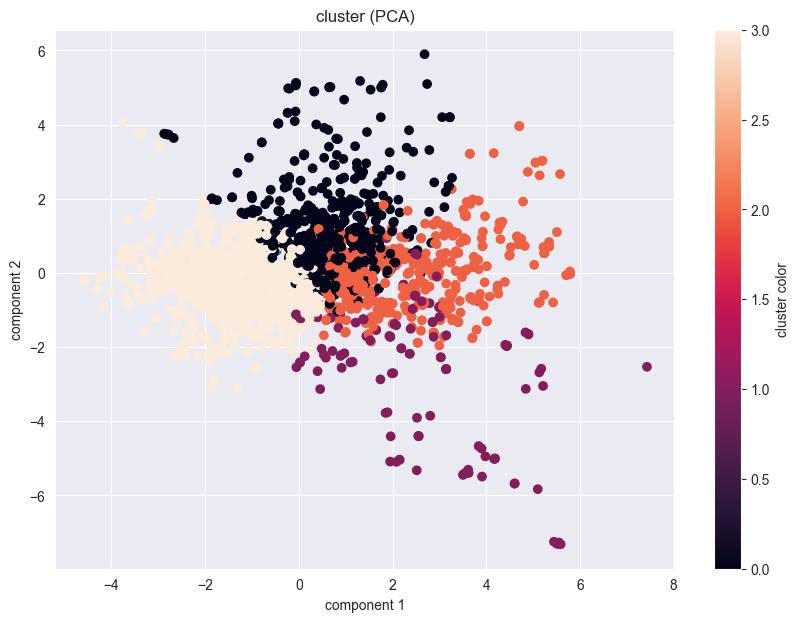

In [18]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X_scaled)
df_filled['cluster'] = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_filled['cluster'])
plt.title('cluster (PCA)')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='cluster color')
plt.show()

In [19]:
df_melted_raw = pd.melt(
    df, 
    id_vars=[
    'ID',
    'brand',
    'model', 
    'horsepower',
    'avg_price',
    'year_embedding',
    'horsepower_range',
    'price_class',
    'segment',
    'country',
    ],
    var_name='year', 
    value_name='price',
    ignore_index=False
)
df_melted_filled = pd.melt(
    df_filled, 
    id_vars=[
    'brand',
    'model', 
    'horsepower',
    'horsepower_range',
    'country',
    'cluster',
    ],
    var_name='year', 
    value_name='growth',
    ignore_index=False
)

In [78]:
df_final = df_melted_raw.merge(df_melted_filled, how = 'left', on = ['brand','model','horsepower','horsepower_range','country','year'])

In [79]:
from data_tools.feature_engineering import update_avg_price

df_final = df_final.pipe(update_avg_price)


In [80]:
df_final = df_final.set_index('ID')

In [82]:
c_features = ['brand', 'model', 'horsepower_range', 'price_class','segment','cluster','country', 'year']
for col in c_features:
    df_final[col] = df_final[col].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

In [25]:
df_final_missed = df_final[df_final['price'].isna()]
len(df_final_missed)

170878

In [26]:
df_final_priced = df_final[~df_final['price'].isna()]
len(df_final_priced)

58962

In [45]:
train_df = df_final_priced.sample(frac=0.8, random_state=42)
pre_test_df = df_final_priced.drop(train_df.index)
eval_df = pre_test_df.sample(frac=0.5, random_state=42)
test_df = pre_test_df.drop(eval_df.index)

train_pool = Pool(
    data=train_df.drop(columns = ['price','segment']),
    label=train_df['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class','cluster','country', 'year'],
    embedding_features=['year_embedding']
)
test_pool = Pool(
    data=test_df.drop(columns = ['price','segment']),
    label=test_df['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class','cluster','country', 'year'],
    embedding_features=['year_embedding']
)
eval_pool = Pool(
    data=eval_df.drop(columns = ['price','segment']),
    label=eval_df['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class','cluster','country', 'year'],
    embedding_features=['year_embedding']
)

model_params = {
    'iterations': 1000,
    'learning_rate': 0.058092559022472755,
    'depth': 10,
    'random_state': 42,
    'loss_function': 'MAE',
    'eval_metric': 'MAE',
    'early_stopping_rounds': 50,
    'verbose': 200,
    'l2_leaf_reg': 0.003019467024977797,
}

model = CatBoostRegressor(**model_params)
model.fit(
    train_pool,
    eval_set=eval_pool,
    early_stopping_rounds=50,
    verbose=200
)

preds = model.predict(test_pool)
mape = np.mean(np.abs((test_df['price'] - preds) / test_df['price'])) * 100
print(f'MAPE: {mape:.2f}%')


0:	learn: 1726941.6224287	test: 1648998.2894477	best: 1648998.2894477 (0)	total: 22.7ms	remaining: 22.7s
200:	learn: 158267.7962198	test: 208009.3776394	best: 208009.3776394 (200)	total: 18.8s	remaining: 1m 14s
400:	learn: 131844.2585098	test: 186859.9925189	best: 186849.1787227 (397)	total: 37.5s	remaining: 56s
600:	learn: 116208.3583125	test: 178789.3612406	best: 178721.7132768 (598)	total: 54.9s	remaining: 36.4s
800:	learn: 105421.6649499	test: 172699.8278326	best: 172688.6570264 (798)	total: 1m 12s	remaining: 18.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 171386.4887
bestIteration = 908

Shrink model to first 909 iterations.
MAPE: 4.32%


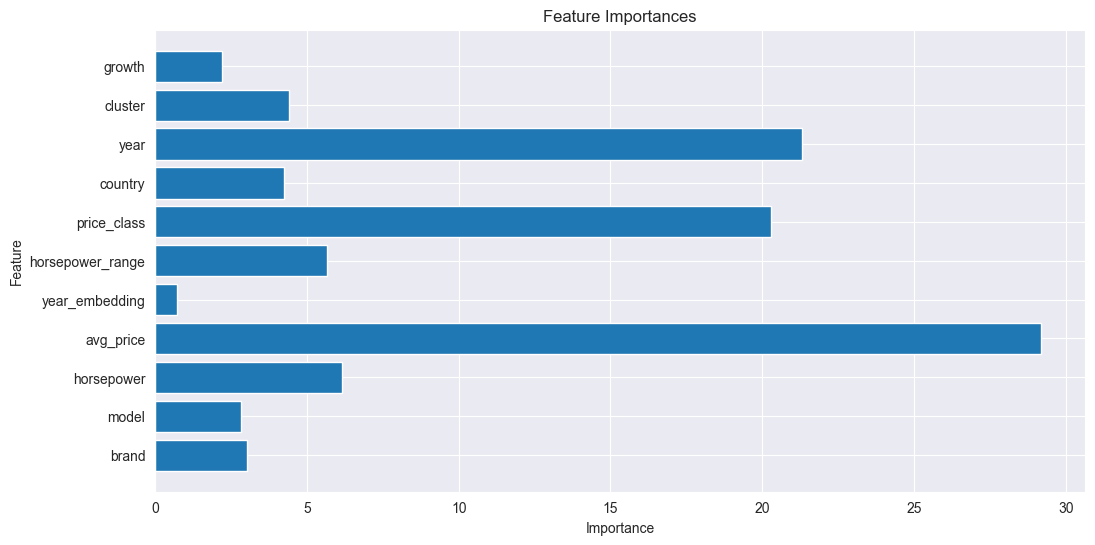

In [32]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = train_pool.get_feature_names()

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

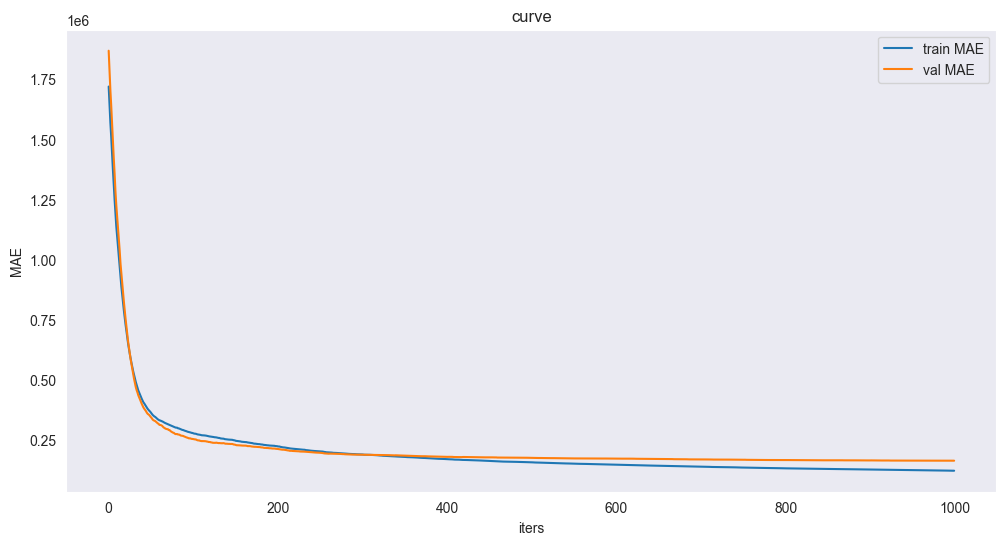

In [33]:
evals_result = model.get_evals_result()

plt.figure(figsize=(12, 6))
plt.plot(evals_result['learn']['MAE'], label='train MAE')
plt.plot(evals_result['validation']['MAE'], label='val MAE')
plt.xlabel('iters')
plt.ylabel('MAE')
plt.title('curve')
plt.legend()
plt.grid()
plt.show()

In [35]:
from catboost import cv

pool = Pool(
    data=df_final_priced.drop(columns=['price', 'segment']),
    label=df_final_priced['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class','cluster','country', 'year'],
    embedding_features=['year_embedding']
)
cv_data = cv(
    pool=pool,
    params=model_params,
    fold_count=5,
    partition_random_seed=42,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 3336345.5189820	test: 3313169.4399903	best: 3313169.4399903 (0)	total: 30.6ms	remaining: 30.6s
200:	learn: 226121.0964885	test: 229695.5066214	best: 229695.5066214 (200)	total: 18.8s	remaining: 1m 14s
400:	learn: 175478.9359355	test: 189143.6960772	best: 189143.6960772 (400)	total: 42.1s	remaining: 1m 2s
600:	learn: 149863.1596207	test: 172326.5717505	best: 172326.5717505 (600)	total: 1m 5s	remaining: 43.4s
800:	learn: 133746.7593459	test: 164086.2957876	best: 164086.2957876 (800)	total: 1m 27s	remaining: 21.7s
999:	learn: 123177.9456414	test: 159156.9592933	best: 159156.9592933 (999)	total: 1m 53s	remaining: 0us

bestTest = 159156.9593
bestIteration = 999

Training on fold [1/5]
0:	learn: 3330282.8677163	test: 3339098.0235886	best: 3339098.0235886 (0)	total: 26.7ms	remaining: 26.6s
200:	learn: 219003.2518042	test: 233256.1310384	best: 233256.1310384 (200)	total: 20.6s	remaining: 1m 22s
400:	learn: 174322.0774036	test: 198494.9795135	best: 198494.979513

0:	learn: 2503644.5650523	test: 2747265.8965586	best: 2747265.8965586 (0)	total: 97.2ms	remaining: 1m 37s
200:	learn: 253716.5214712	test: 306111.3624771	best: 305884.3831756 (166)	total: 21.4s	remaining: 1m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 305884.3832
bestIteration = 166

Shrink model to first 167 iterations.
RMSE: 5.03%


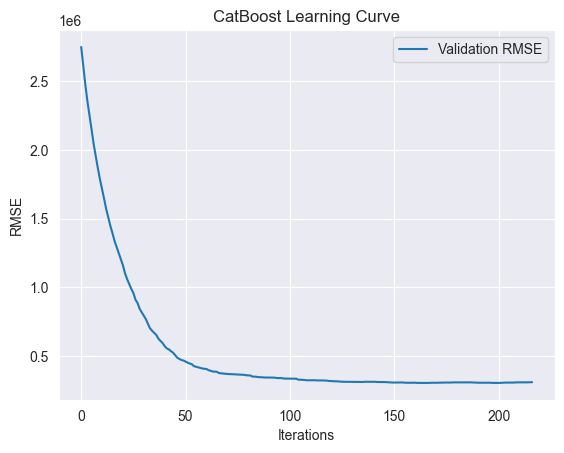

In [43]:
df_final_priced_no_avg = df_final_priced.drop(columns=['avg_price', 'year_embedding'])

train_df2 = df_final_priced_no_avg.sample(frac=0.8, random_state=42)
pre_test_df2 = df_final_priced_no_avg.drop(train_df2.index)
eval_df2 = pre_test_df2.sample(frac=0.5, random_state=42)
test_df2 = pre_test_df2.drop(eval_df2.index)

train_pool2 = Pool(
    data=train_df2.drop(columns=['price']),
    label=train_df2['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)
test_pool2 = Pool(
    data=test_df2.drop(columns=['price']),
    label=test_df2['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)
eval_pool2 = Pool(
    data=eval_df2.drop(columns=['price']),
    label=eval_df2['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)

model2_params = {
    'iterations': 1000,
    'learning_rate': 0.058092559022472755,
    'depth': 10,
    'random_state': 42,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 50,
    'verbose': 200,
    'l2_leaf_reg': 0.003019467024977797,
}

model2 = CatBoostRegressor(**model2_params)
model2.fit(
    train_pool2,
    eval_set=eval_pool2,
    early_stopping_rounds=50,
    verbose=200
)

preds2 = model2.predict(test_pool2)
mape = np.mean(np.abs((test_df2['price'] - preds2) / test_df2['price'])) * 100
print(f'RMSE: {mape:.2f}%')

eval_results = model2.get_evals_result()
plt.plot(eval_results['validation']['RMSE'], label='Validation RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('CatBoost Learning Curve')
plt.legend()
plt.show()

0:	learn: 1758729.6473848	test: 1680542.0481072	best: 1680542.0481072 (0)	total: 30.1ms	remaining: 30.1s
200:	learn: 230620.1988019	test: 352532.0328256	best: 352532.0328256 (200)	total: 6.01s	remaining: 23.9s
400:	learn: 200115.8057983	test: 292128.1451233	best: 292125.8577323 (399)	total: 10.6s	remaining: 15.9s
600:	learn: 189077.7647648	test: 269921.1579289	best: 269921.1579289 (600)	total: 15.6s	remaining: 10.4s
800:	learn: 184697.4805237	test: 260228.4730007	best: 260178.0174397 (798)	total: 21.2s	remaining: 5.27s
999:	learn: 182121.7152857	test: 253345.1773094	best: 253345.1773094 (999)	total: 26.3s	remaining: 0us

bestTest = 253345.1773
bestIteration = 999

MAPE: 6.73%


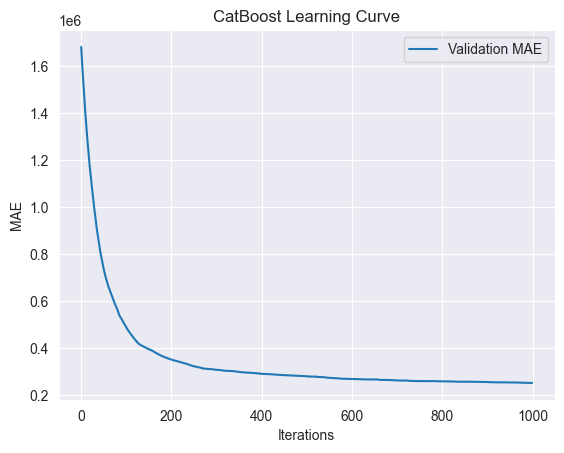

In [47]:
df_final_priced_lags = df_final_priced.drop(columns=['avg_price', 'year_embedding'])
df_final_priced_lags['prev_year_price'] = df_final_priced_lags.groupby(['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'segment'])['price'].shift(1)
df_final_priced_lags['next_year_price'] = df_final_priced_lags.groupby(['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'segment'])['price'].shift(-1)

# df_final_priced['prev_year_price'] = df_final_priced['prev_year_price'].fillna(method='ffill')
# df_final_priced['next_year_price'] = df_final_priced['next_year_price'].fillna(method='bfill')

# df_final_priced_lags = df_final_priced_lags.dropna()

train_df3 = df_final_priced_lags.sample(frac=0.8, random_state=42)
pre_test_df3 = df_final_priced_lags.drop(train_df3.index)
eval_df3 = pre_test_df3.sample(frac=0.5, random_state=42)
test_df3 = pre_test_df3.drop(eval_df3.index)

train_pool3 = Pool(
    data=train_df3.drop(columns=['price']),
    label=train_df3['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)
test_pool3 = Pool(
    data=test_df3.drop(columns=['price']),
    label=test_df3['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)
eval_pool3 = Pool(
    data=eval_df3.drop(columns=['price']),
    label=eval_df3['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)

model_params3 = {
    'random_state': 42,
    'loss_function': 'MAE',
    'eval_metric': 'MAE',
    'early_stopping_rounds': 50,
    'depth':3,
}

model3 = CatBoostRegressor(**model_params3)
model3.fit(
    train_pool3,
    eval_set=eval_pool3,
    early_stopping_rounds=50,
    verbose=200
)

preds3 = model3.predict(test_pool3)
mape = np.mean(np.abs((test_df3['price'] - preds3) / test_df3['price'])) * 100
print(f'MAPE: {mape:.2f}%')

eval_results = model3.get_evals_result()
plt.plot(eval_results['validation']['MAE'], label='Validation MAE')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('CatBoost Learning Curve')
plt.legend()
plt.show()

MAPE: 4.84%


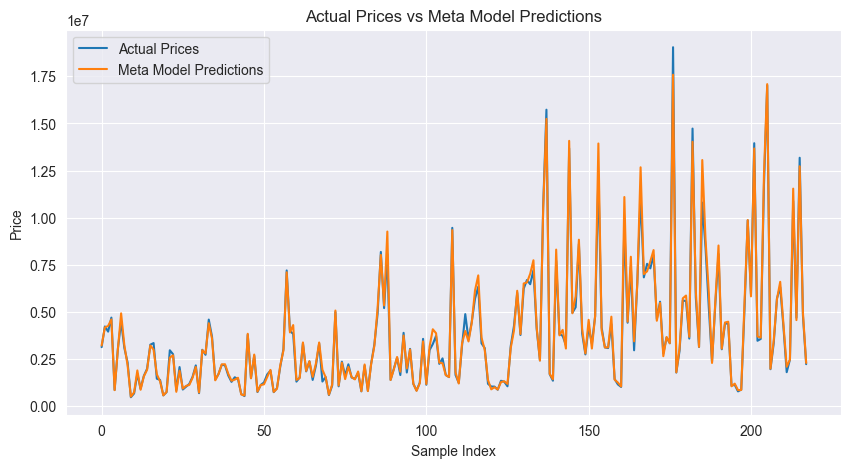

In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, Pool

train_preds1 = model.predict(train_pool)
train_preds2 = model2.predict(train_pool2)
train_preds3 = model3.predict(train_pool3)

train_meta = pd.DataFrame({
    'preds1': train_preds1,
    'preds2': train_preds2,
    'preds3': train_preds3,
    'brand': train_df['brand'].values,
    'model': train_df['model'].values,
    'horsepower_range': train_df['horsepower_range'].values,
    'price_class': train_df['price_class'].values,
    'cluster': train_df['cluster'].values,
    'country': train_df['country'].values,
    'year': train_df['year'].values
})

test_preds1 = model.predict(test_pool)
test_preds2 = model2.predict(test_pool2)
test_preds3 = model3.predict(test_pool3)

test_meta = pd.DataFrame({
    'preds1': test_preds1,
    'preds2': test_preds2,
    'preds3': test_preds3,
    'brand': test_df['brand'].values,
    'model': test_df['model'].values,
    'horsepower_range': test_df['horsepower_range'].values,
    'price_class': test_df['price_class'].values,
    'cluster': test_df['cluster'].values,
    'country': test_df['country'].values,
    'year': test_df['year'].values
})

meta_model = LinearRegression()
meta_model.fit(train_meta[['preds1', 'preds2', 'preds3']], train_df['price'])

meta_preds = meta_model.predict(test_meta[['preds1', 'preds2', 'preds3']])

mape = np.mean(np.abs((test_df['price'] - meta_preds) / test_df['price'])) * 100
print(f'MAPE: {mape:.2f}%')

plt.figure(figsize=(10, 5))
plt.plot(test_df['price'].values, label='Actual Prices')
plt.plot(meta_preds, label='Meta Model Predictions')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual Prices vs Meta Model Predictions')
plt.show()


In [53]:
import lightgbm as lgb
import pandas as pd
import numpy as np

train_preds_model1 = model.predict(train_pool)
train_preds_model2 = model2.predict(train_pool2)
train_preds_model3 = model3.predict(train_pool3)

test_preds_model1 = model.predict(test_pool)
test_preds_model2 = model2.predict(test_pool2)
test_preds_model3 = model3.predict(test_pool3)

train_meta = pd.DataFrame({
    'pred_model1': train_preds_model1,
    'pred_model2': train_preds_model2,
    'pred_model3': train_preds_model3,
    'price': train_df['price'].values
})

test_meta = pd.DataFrame({
    'pred_model1': test_preds_model1,
    'pred_model2': test_preds_model2,
    'pred_model3': test_preds_model3,
    'price': test_df['price'].values
})

train_data = lgb.Dataset(train_meta.drop(columns=['price']), label=train_meta['price'])
test_data = lgb.Dataset(test_meta.drop(columns=['price']), label=test_meta['price'], reference=train_data)


In [63]:
train_preds_model1 = model.predict(train_pool)
train_preds_model2 = model2.predict(train_pool2)
train_preds_model3 = model3.predict(train_pool3)

test_preds_model1 = model.predict(test_pool)
test_preds_model2 = model2.predict(test_pool2)
test_preds_model3 = model3.predict(test_pool3)

def create_presence_features(df, columns):
    for col in columns:
        df[f'{col}_presence'] = df[col].apply(lambda x: 0 if pd.isna(x) else 1)
    return df

numeric_features = ['prev_year_price', 'next_year_price']
categorical_features = ['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']

train_meta = pd.DataFrame({
    'pred_model1': train_preds_model1,
    'pred_model2': train_preds_model2,
    'pred_model3': train_preds_model3,
    'price': train_df['price'].values
})

test_meta = pd.DataFrame({
    'pred_model1': test_preds_model1,
    'pred_model2': test_preds_model2,
    'pred_model3': test_preds_model3,
    'price': test_df['price'].values
})

train_meta[numeric_features] = train_df[numeric_features].reset_index(drop=True)
test_meta[numeric_features] = test_df[numeric_features].reset_index(drop=True)

train_meta = create_presence_features(train_meta, numeric_features)
test_meta = create_presence_features(test_meta, numeric_features)

train_meta[categorical_features] = train_df[categorical_features].reset_index(drop=True)
test_meta[categorical_features] = test_df[categorical_features].reset_index(drop=True)

train_data = lgb.Dataset(train_meta.drop(columns=['price']), label=train_meta['price'], categorical_feature=categorical_features)
test_data = lgb.Dataset(test_meta.drop(columns=['price']), label=test_meta['price'], reference=train_data, categorical_feature=categorical_features)


0:	learn: 1713579.2867402	test: 1636240.5421735	best: 1636240.5421735 (0)	total: 46ms	remaining: 45.9s
200:	learn: 155174.1984084	test: 201187.8569172	best: 201187.8569172 (200)	total: 19s	remaining: 1m 15s
400:	learn: 128975.2738887	test: 181181.0455850	best: 181181.0455850 (400)	total: 37.4s	remaining: 55.8s
600:	learn: 113881.7876002	test: 173826.6095372	best: 173826.6095372 (600)	total: 55.8s	remaining: 37s
800:	learn: 103491.5313188	test: 168073.9840358	best: 167995.0622827 (796)	total: 1m 14s	remaining: 18.5s
999:	learn: 95253.7929740	test: 166425.6573793	best: 165396.8305581 (987)	total: 1m 34s	remaining: 0us

bestTest = 165396.8306
bestIteration = 987

Shrink model to first 988 iterations.
MAPE: 4.35%


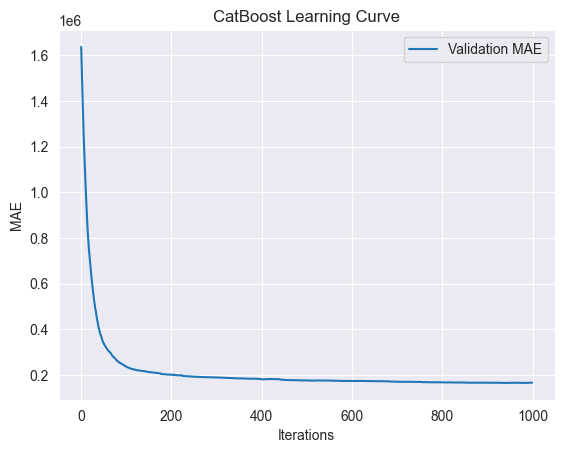

In [72]:

def prepare_data(df):
    numeric_features = ['prev_year_price', 'next_year_price']
    for col in numeric_features:
        df[f'{col}_presence'] = df[col].apply(lambda x: 0 if pd.isna(x) else 1)
    
    df = df.drop(columns = ['year_embedding'])
    
    return df

train_df = df_final_priced.sample(frac=0.8, random_state=42)
pre_test_df = df_final_priced.drop(train_df.index)
eval_df = pre_test_df.sample(frac=0.5, random_state=42)
test_df = pre_test_df.drop(eval_df.index)


categorical_features = ['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']

train_df = prepare_data(train_df)
test_df = prepare_data(test_df)
eval_df = prepare_data(eval_df)


train_pool = Pool(
    data=train_df.drop(columns=['price']),
    label=train_df['price'],
    cat_features=categorical_features
)
test_pool = Pool(
    data=test_df.drop(columns=['price']),
    label=test_df['price'],
    cat_features=categorical_features
)
eval_pool = Pool(
    data=eval_df.drop(columns=['price']),
    label=eval_df['price'],
    cat_features=categorical_features
)

model_params = {
    'iterations': 1000,
    'learning_rate': 0.058092559022472755,
    'depth': 10,
    'random_state': 42,
    'loss_function': 'MAE',
    'eval_metric': 'MAE',
    'verbose': 200,
    'l2_leaf_reg': 0.003019467024977797,
}

model = CatBoostRegressor(**model_params)
model.fit(
    train_pool,
    eval_set=eval_pool,
    early_stopping_rounds=50,
    verbose=200
)

preds = model.predict(test_pool)
mape = np.mean(np.abs((test_df['price'] - preds) / test_df['price'])) * 100
print(f'MAPE: {mape:.2f}%')

eval_results = model.get_evals_result()
plt.plot(eval_results['validation']['MAE'], label='Validation MAE')
plt.xlabel('Iterations')
plt.ylabel('MAE')
plt.title('CatBoost Learning Curve')
plt.legend()
plt.show()


In [85]:
df_with_price = df_final.dropna(subset=['price'])
df_without_price = df_final[df_final['price'].isna()]

train_pool1 = Pool(
    data=df_with_price.drop(columns=['price']),
    label=df_with_price['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment'],
    embedding_features=['year_embedding']
)

model1 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.058,
    depth=10,
    random_state=42,
    loss_function='MAE',
    eval_metric='MAE',
    verbose=200
)
model1.fit(train_pool1)


0:	learn: 1726788.8228527	total: 98.1ms	remaining: 1m 37s
200:	learn: 221327.6247438	total: 23.8s	remaining: 1m 34s
400:	learn: 174320.6274176	total: 49.2s	remaining: 1m 13s
600:	learn: 150681.2563506	total: 1m 13s	remaining: 49.1s
800:	learn: 137458.1668595	total: 1m 35s	remaining: 23.8s
999:	learn: 127215.1793562	total: 2m 1s	remaining: 0us


In [86]:
df_final_no_avg = df_final.drop(columns=['avg_price', 'year_embedding'])
df_with_price_no_avg = df_with_price.drop(columns=['avg_price', 'year_embedding'])

train_pool2 = Pool(
    data=df_with_price_no_avg.drop(columns=['price']),
    label=df_with_price_no_avg['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)

model2 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.058,
    depth=10,
    random_state=42,
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=200
)
model2.fit(train_pool2)


0:	learn: 2536690.5071751	total: 75.4ms	remaining: 1m 15s
200:	learn: 411779.1714738	total: 22.4s	remaining: 1m 28s
400:	learn: 332886.1630401	total: 45.2s	remaining: 1m 7s
600:	learn: 298478.7440766	total: 1m 8s	remaining: 45.4s
800:	learn: 275658.1960696	total: 1m 37s	remaining: 24.1s
999:	learn: 258940.7177668	total: 2m 4s	remaining: 0us


In [90]:
df_final_lags = df_with_price.copy()
df_final_lags['prev_year_price'] = df_final_lags.groupby(['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'segment'])['price'].shift(1)
df_final_lags['next_year_price'] = df_final_lags.groupby(['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'segment'])['price'].shift(-1)
df_final_lags = df_final_lags.fillna(0)

train_pool3 = Pool(
    data=df_final_lags.drop(columns=['price','year_embedding']),
    label=df_final_lags['price'],
    cat_features=['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'year', 'segment']
)

model3 = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.058,
    depth=3,
    random_state=42,
    loss_function='MAE',
    eval_metric='MAE',
    verbose=200
)
model3.fit(train_pool3)



0:	learn: 1734630.4661412	total: 34.6ms	remaining: 34.6s
200:	learn: 187429.3950755	total: 6.79s	remaining: 27s
400:	learn: 174140.2072089	total: 13.5s	remaining: 20.1s
600:	learn: 168545.6172431	total: 22.1s	remaining: 14.7s
800:	learn: 164781.4534498	total: 32.3s	remaining: 8.03s
999:	learn: 162001.6445664	total: 42.2s	remaining: 0us


In [100]:
len(df_final_lags)

58962

In [103]:
preds1 = model1.predict(df_without_price.drop(columns=['price']))
preds2 = model2.predict(df_without_price.drop(columns=['price', 'avg_price', 'year_embedding']))
df_final_lags_w = df_without_price.copy()
df_final_lags_w['prev_year_price'] = df_final_lags_w.groupby(['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'segment'])['price'].shift(1)
df_final_lags_w['next_year_price'] = df_final_lags_w.groupby(['brand', 'model', 'horsepower_range', 'price_class', 'cluster', 'country', 'segment'])['price'].shift(-1)
df_final_lags_w = df_final_lags_w.fillna(0)

preds3 = model3.predict(df_final_lags_w.drop(columns=['price','year_embedding']))

meta_features = pd.DataFrame({
    'model1': preds1,
    'model2': preds2,
    'model3': preds3
})

train_meta_features1 = model1.predict(df_with_price.drop(columns=['price']))
train_meta_features2 = model2.predict(df_with_price.drop(columns=['price', 'avg_price', 'year_embedding']))
train_meta_features3 = model3.predict(df_final_lags.drop(columns=['price','year_embedding']))

train_meta = pd.DataFrame({
    'model1': train_meta_features1,
    'model2': train_meta_features2,
    'model3': train_meta_features3,
    'price': df_with_price['price']
})

meta_train_pool = Pool(
    data=train_meta.drop(columns=['price']),
    label=train_meta['price']
)

meta_model = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    depth=6,
    random_state=42,
    loss_function='MAE',
    eval_metric='MAE',
    verbose=200
)
meta_model.fit(meta_train_pool)



0:	learn: 1730455.1364886	total: 6.77ms	remaining: 10.1s
200:	learn: 139940.4952932	total: 1.21s	remaining: 7.84s
400:	learn: 133714.7727247	total: 2.42s	remaining: 6.62s
600:	learn: 130549.7803897	total: 3.63s	remaining: 5.42s
800:	learn: 128476.4836622	total: 4.84s	remaining: 4.22s
1000:	learn: 126979.9127620	total: 6.05s	remaining: 3.02s
1200:	learn: 125791.7306194	total: 7.26s	remaining: 1.81s
1400:	learn: 124931.7899420	total: 8.49s	remaining: 600ms
1499:	learn: 124476.5047307	total: 9.1s	remaining: 0us


In [104]:
meta_preds = meta_model.predict(meta_features)
df_final.loc[df_final['price'].isna(), 'price'] = meta_preds

In [105]:
df_final

,brand,model,horsepower,avg_price,year_embedding,horsepower_range,price_class,segment,country,year,price,cluster,growth
ID,,,,,,,,,,,,,
1,Acura,MDX,290.0,3.840760e+06,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]",250-299,Medium,Other,Japan,2012,2.719417e+06,3,1.000000
2,Acura,MDX,290.0,3.850280e+06,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]",250-299,Medium,Other,Japan,2012,2.719417e+06,3,1.000000
3,Acura,MDX,290.0,2.680500e+06,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",250-299,Medium-Low,Other,Japan,2012,2.243835e+06,3,1.000000
4,Acura,MDX,290.0,2.863867e+06,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",250-299,Medium-Low,Other,Japan,2012,2.269258e+06,3,1.000000
5,Acura,RDX,277.0,2.226967e+06,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]",250-299,Medium-Low,Other,Japan,2012,1.843591e+06,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676,Москвич,3,150.0,1.999900e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",100-199,Low,Other,Russia,2024,1.796717e+06,3,1.052056
17677,Москвич,3,150.0,2.082750e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",100-199,Medium-Low,Other,Russia,2024,2.087405e+06,3,1.052056
17678,Москвич,3,109.0,1.872550e+06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",100-199,Low,Other,Russia,2024,1.778468e+06,3,1.052056


In [128]:
predictions_df = df_final.reset_index()[['ID', 'brand', 'model', 'horsepower','year', 'price']]

In [129]:
predictions_df

,ID,brand,model,horsepower,year,price
0,1,Acura,MDX,290.0,2012,2.719417e+06
1,2,Acura,MDX,290.0,2012,2.719417e+06
2,3,Acura,MDX,290.0,2012,2.243835e+06
3,4,Acura,MDX,290.0,2012,2.269258e+06
4,5,Acura,RDX,277.0,2012,1.843591e+06
...,...,...,...,...,...,...
229835,17676,Москвич,3,150.0,2024,1.796717e+06
229836,17677,Москвич,3,150.0,2024,2.087405e+06
229837,17678,Москвич,3,109.0,2024,1.778468e+06
229838,17679,Москвич,3,150.0,2024,2.500000e+06


In [130]:
predictions_df['price'] = predictions_df['price'].round(2)
pred_pivot = predictions_df.pivot_table(index=['ID','brand','model','horsepower'], columns='year',values='price',)

In [131]:
pred_pivot.to_csv('result.csv', index=False)

<Axes: >

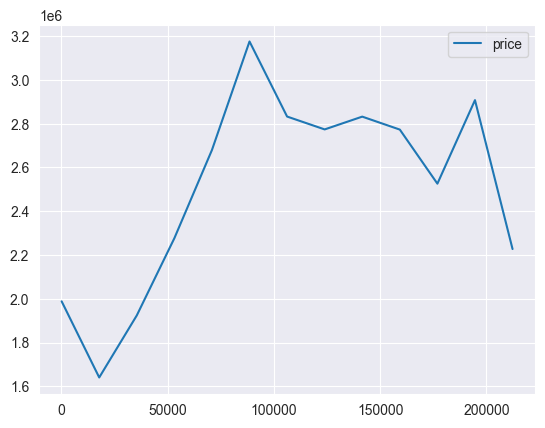

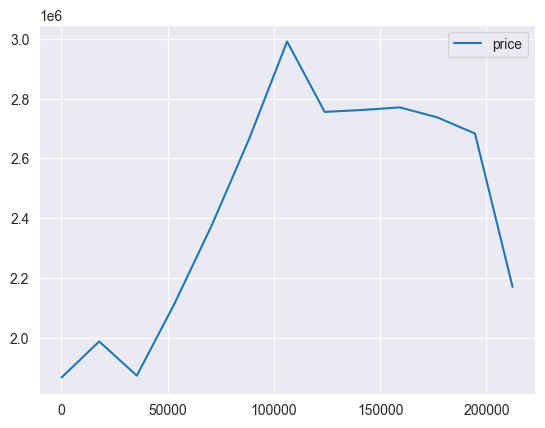

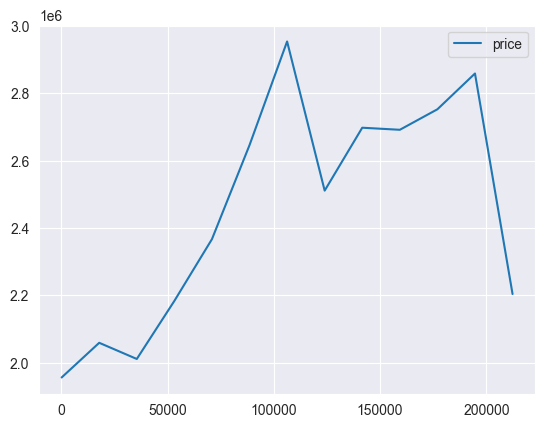

In [153]:
predictions_df.query('ID == 148')[['year','price']].plot()
predictions_df.query('ID == 149')[['year','price']].plot()
predictions_df.query('ID == 150')[['year','price']].plot()